# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [124]:
data = pd.read_csv('dataset_clustering.csv')
data.head()

User_ID  Age  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16            9.654486        2.458001     5.198926   
1        2   17            9.158143        0.392095     8.866097   
2        3   15            5.028755        0.520119     4.943095   
3        4   17            7.951103        1.022630     5.262773   
4        5   17            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

   Support_System  Academic_Performance  Gender_M  label  Cluster      PCA1  \
0               2                     1     False      4        5 -0.456118   
1               2                     2      True      2        2  0.586505   
2               2                     3      True      2        2  0.587752   
3               2                     0     False      4        5 -0.461954   
4               0                     3     False      3        3 -0.575454   

       PCA2  Fitur  
0  0.418714      1  
1  0.360753      2  
2  0.401413      3  
3  0.390532      0  
4 -0.427342      3

In [125]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Social_Media_Hours     5000 non-null   float64
 3   Exercise_Hours         5000 non-null   float64
 4   Sleep_Hours            5000 non-null   float64
 5   Screen_Time_Hours      5000 non-null   float64
 6   Survey_Stress_Score    5000 non-null   int64  
 7   Wearable_Stress_Score  5000 non-null   float64
 8   Support_System         5000 non-null   int64  
 9   Academic_Performance   5000 non-null   int64  
 10  Gender_M               5000 non-null   bool   
 11  label                  5000 non-null   int64  
 12  Cluster                5000 non-null   int64  
 13  PCA1                   5000 non-null   float64
 14  PCA2                   5000 non-null

In [126]:
# Mapping kembali ke bentuk aslinya
data["Gender"] = data["Gender_M"].map({False: "Female", True: "Male"})
data["Academic_Performance"] = data["Academic_Performance"].map({0: "Average", 1: "Excellent", 2: "Good", 3: "Poor"})
data["Support_System"] = data["Support_System"].map({0: "High", 1: "Low", 2: "Moderate"})

# Hapus kolom hasil encoding jika tidak diperlukan
data.drop(columns=["Gender_M"], inplace=True)

# Simpan kembali hasilnya file baru
data.to_csv("hasil_inverse_clustering.csv", index=False)

In [110]:
print(data.columns)

Index(['User_ID', 'Age', 'Social_Media_Hours', 'Exercise_Hours', 'Sleep_Hours',
       'Screen_Time_Hours', 'Survey_Stress_Score', 'Wearable_Stress_Score',
       'Support_System', 'Academic_Performance', 'label', 'Cluster', 'PCA1',
       'PCA2', 'Fitur', 'Gender'],
      dtype='object')


In [127]:
data.head()

User_ID  Age  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16            9.654486        2.458001     5.198926   
1        2   17            9.158143        0.392095     8.866097   
2        3   15            5.028755        0.520119     4.943095   
3        4   17            7.951103        1.022630     5.262773   
4        5   17            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

  Support_System Academic_Performance  label  Cluster      PCA1      PCA2  \
0       Moderate            Excellent      4        5 -0.456118  0.418714   
1       Moderate                 Good      2        2  0.586505  0.360753   
2       Moderate                 Poor      2        2  0.587752  0.401413   
3       Moderate              Average      4        5 -0.461954  0.390532   
4           High                 Poor      3        3 -0.575454 -0.427342   

   Fitur  Gender  
0      1  Female  
1      2    Male  
2      3    Male  
3      0  Female  
4      3  Female

In [128]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Social_Media_Hours     5000 non-null   float64
 3   Exercise_Hours         5000 non-null   float64
 4   Sleep_Hours            5000 non-null   float64
 5   Screen_Time_Hours      5000 non-null   float64
 6   Survey_Stress_Score    5000 non-null   int64  
 7   Wearable_Stress_Score  5000 non-null   float64
 8   Support_System         5000 non-null   object 
 9   Academic_Performance   5000 non-null   object 
 10  label                  5000 non-null   int64  
 11  Cluster                5000 non-null   int64  
 12  PCA1                   5000 non-null   float64
 13  PCA2                   5000 non-null   float64
 14  Fitur                  5000 non-null

In [129]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
User_ID                  0
Age                      0
Social_Media_Hours       0
Exercise_Hours           0
Sleep_Hours              0
Screen_Time_Hours        0
Survey_Stress_Score      0
Wearable_Stress_Score    0
Support_System           0
Academic_Performance     0
label                    0
Cluster                  0
PCA1                     0
PCA2                     0
Fitur                    0
Gender                   0
dtype: int64


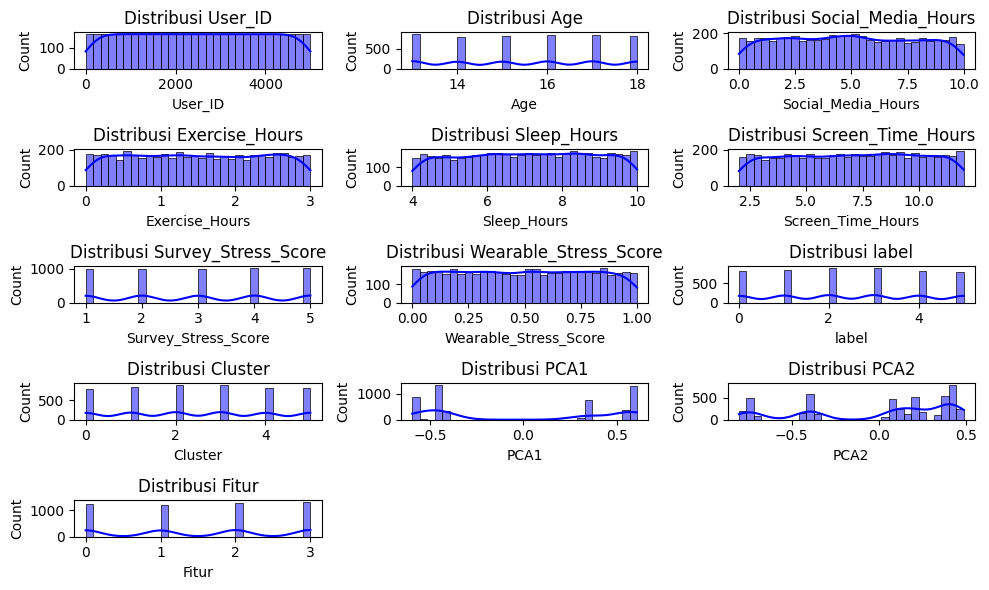

In [130]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

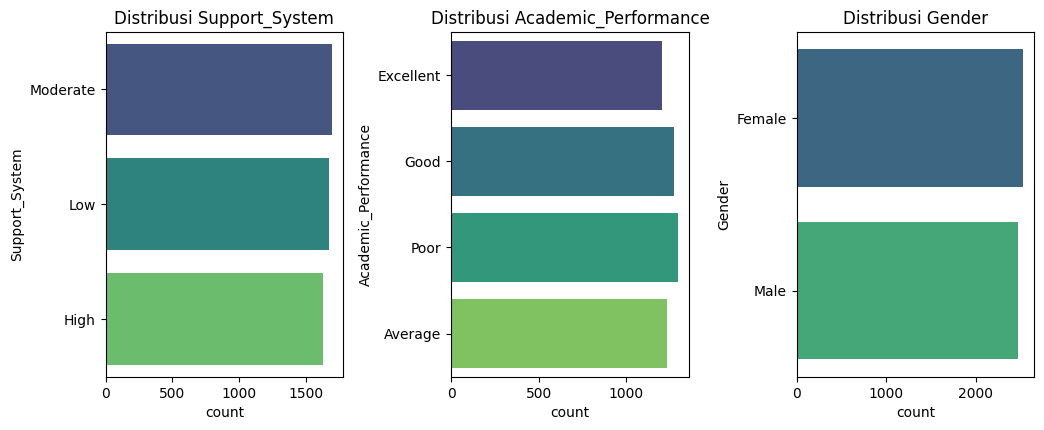

In [58]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], hue=data[column], palette='viridis', legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

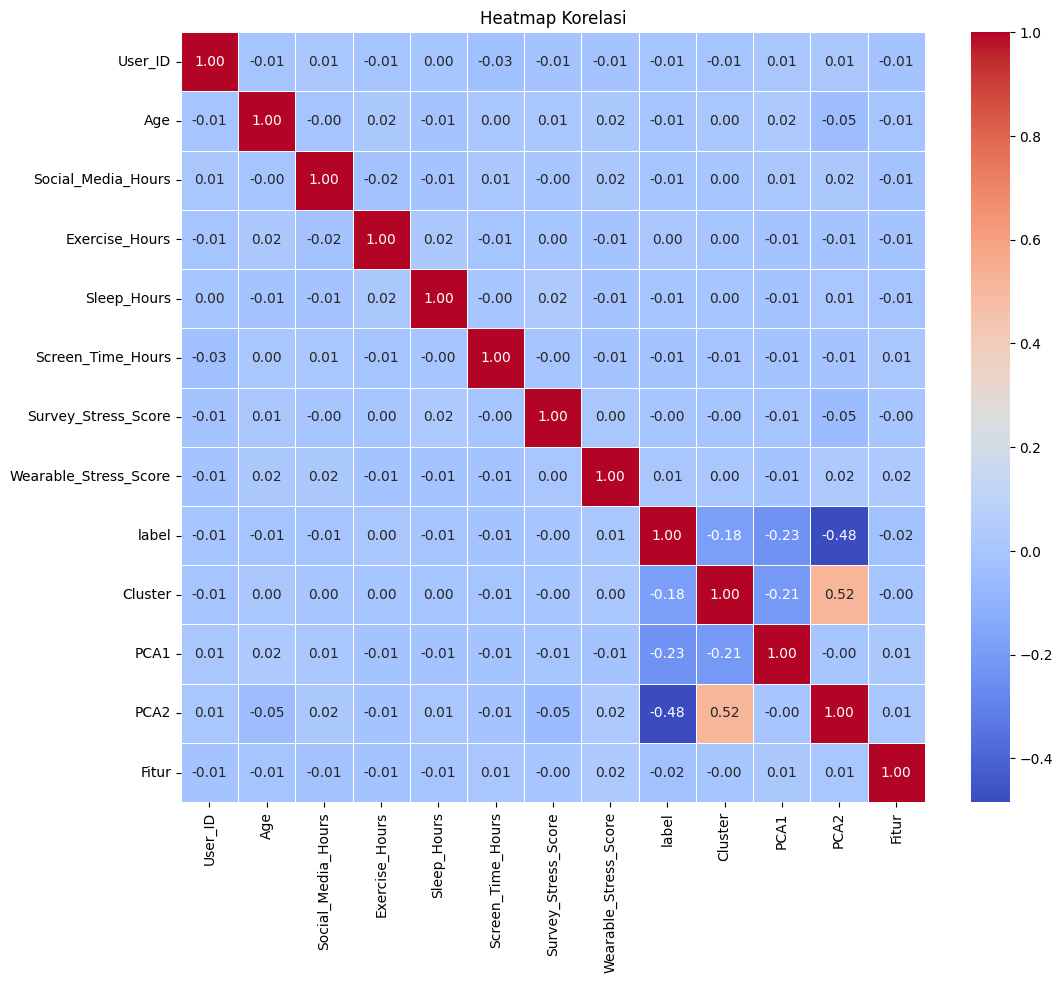

In [131]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

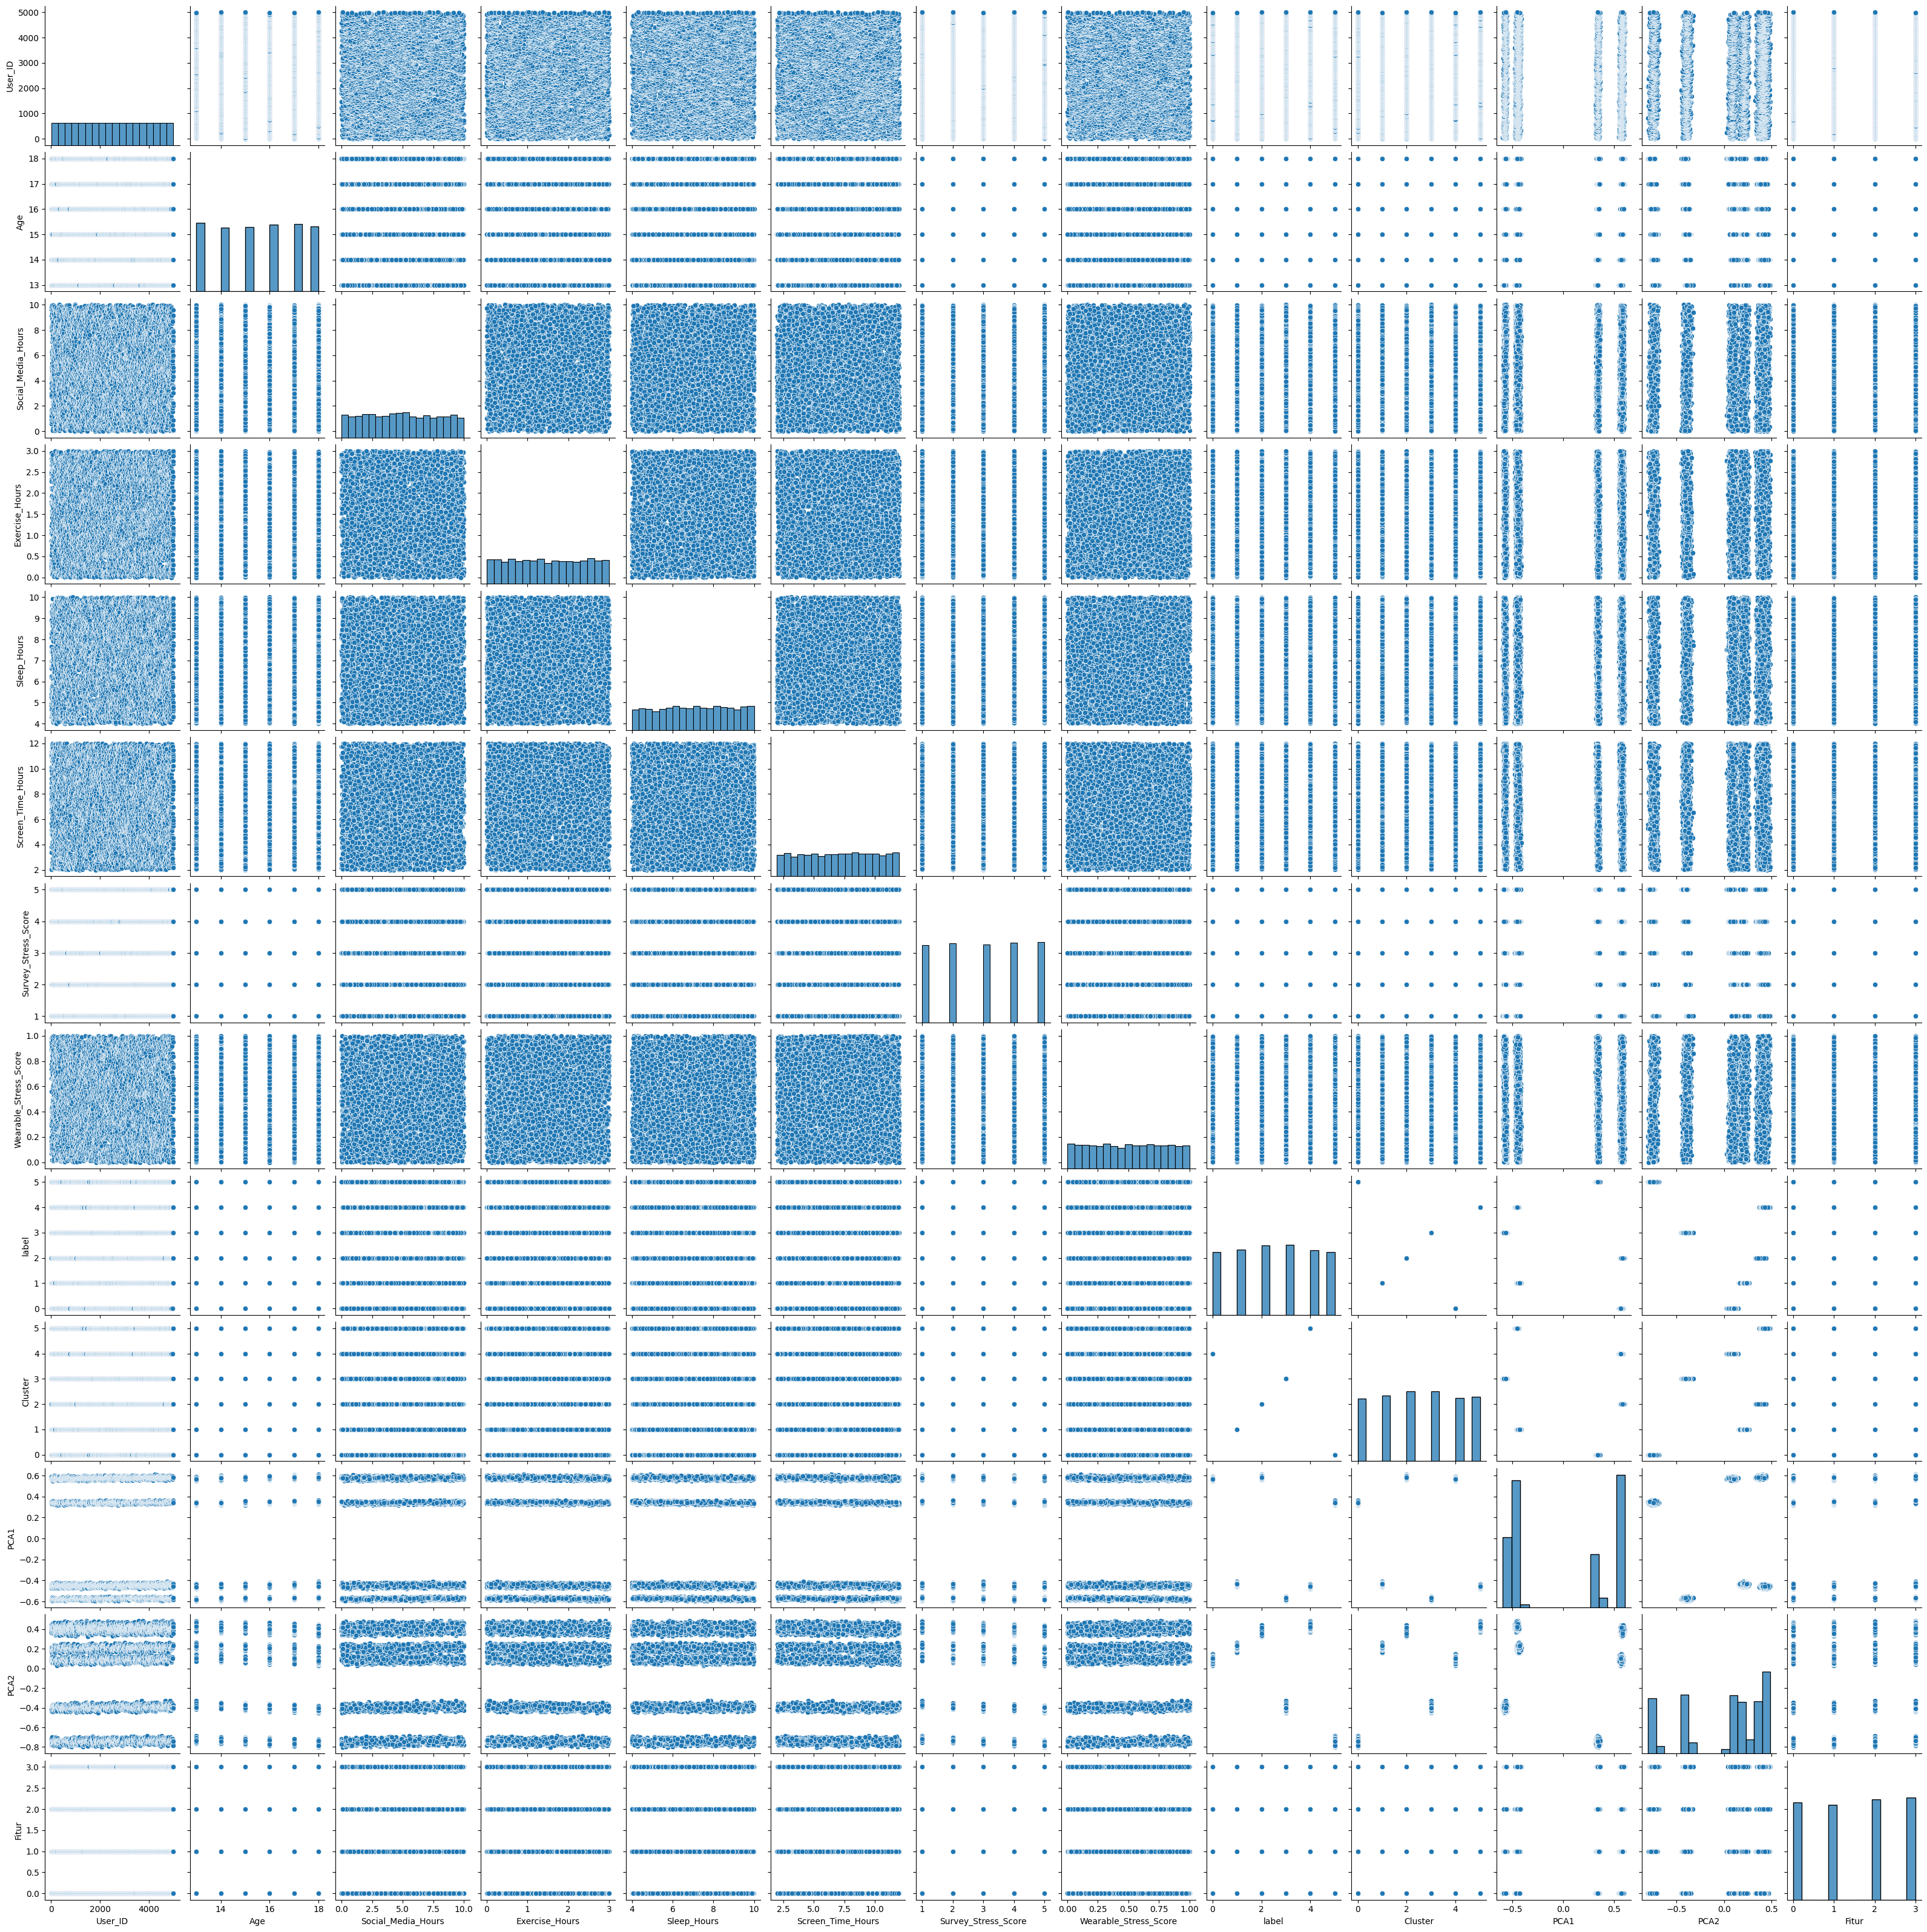

In [60]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

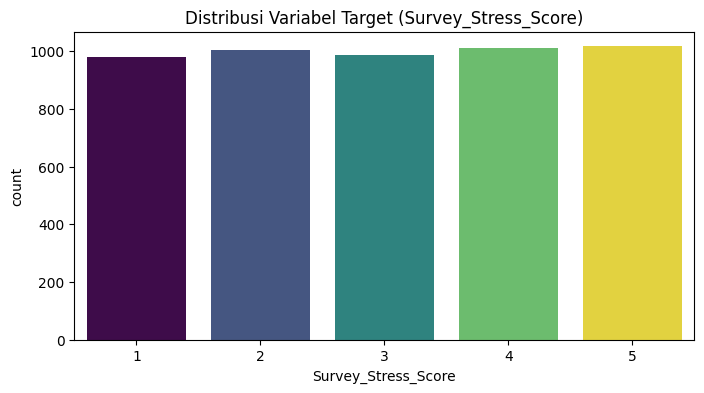

In [67]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Survey_Stress_Score', data=data, hue='Survey_Stress_Score', palette='viridis', legend=False)
plt.title('Distribusi Variabel Target (Survey_Stress_Score)')
plt.show()

In [114]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()
 
# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Gender', 'Support_System', 'Academic_Performance']
 
# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
 
# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

User_ID  Age  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16            9.654486        2.458001     5.198926   
1        2   17            9.158143        0.392095     8.866097   
2        3   15            5.028755        0.520119     4.943095   
3        4   17            7.951103        1.022630     5.262773   
4        5   17            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

   Support_System  Academic_Performance  label  Cluster      PCA1      PCA2  \
0               2                     1      4        5 -0.456118  0.418714   
1               2                     2      2        2  0.586505  0.360753   
2               2                     3      2        2  0.587752  0.401413   
3               2                     0      4        5 -0.461954  0.390532   
4               0                     3      3        3 -0.575454 -0.427342   

   Fitur  Gender  
0      1       0  
1      2       1  
2      3       1  
3      0       0  
4      3       0

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [115]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
 
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Survey_Stress_Score'])
y = data['Survey_Stress_Score']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(4000, 15), y_train=(4000,)
Test set shape: X_test=(1000, 15), y_test=(1000,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [132]:
from sklearn.preprocessing import LabelEncoder

# Buat instance LabelEncoder untuk tiap kolom
label_encoders = {}

# Daftar kolom kategorikal yang sudah di-encode
categorical_columns = ['Gender', 'Support_System', 'Academic_Performance']

# Encode ulang sambil menyimpan encoder untuk masing-masing kolom
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()  # Simpan encoder tiap kolom
    data[column] = label_encoders[column].fit_transform(data[column])

# Simpan hasil encoding untuk nanti digunakan kembali
encoded_data = data.copy()

# Dekode kembali ke bentuk asli
for column in categorical_columns:
    data[column] = label_encoders[column].inverse_transform(encoded_data[column])

# Tampilkan hasil dekoding
print(data.head())


   User_ID  Age  Social_Media_Hours  Exercise_Hours  Sleep_Hours  \
0        1   16            9.654486        2.458001     5.198926   
1        2   17            9.158143        0.392095     8.866097   
2        3   15            5.028755        0.520119     4.943095   
3        4   17            7.951103        1.022630     5.262773   
4        5   17            1.357459        1.225462     6.196080   

   Screen_Time_Hours  Survey_Stress_Score  Wearable_Stress_Score  \
0           8.158189                    3               0.288962   
1           5.151993                    5               0.409446   
2           9.209325                    2               0.423837   
3           9.823658                    5               0.666021   
4          11.338990                    5               0.928060   

  Support_System Academic_Performance  label  Cluster      PCA1      PCA2  \
0       Moderate            Excellent      4        5 -0.456118  0.418714   
1       Moderate            

In [133]:
print(data[categorical_columns].head())

   Gender Support_System Academic_Performance
0  Female       Moderate            Excellent
1    Male       Moderate                 Good
2    Male       Moderate                 Poor
3  Female       Moderate              Average
4  Female           High                 Poor


In [141]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
# Mengubah y_train menjadi kategori diskrit
threshold = 0.5  # Misalnya, ambil 0.5 sebagai threshold
y_train_class = np.where(y_train > threshold, 1, 0)  # 1 jika lebih dari 0.5, 0 jika tidak

# Melatih model klasifikasi
knn = KNeighborsClassifier().fit(X_train, y_train_class)
dt = DecisionTreeClassifier().fit(X_train, y_train_class)
rf = RandomForestClassifier().fit(X_train, y_train_class)
svm = SVC().fit(X_train, y_train_class)
nb = GaussianNB().fit(X_train, y_train_class)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Mengubah y_train menjadi kategori diskrit, Disini mengambil nilai y_train lebih besar dari 0.5, sehingga kita bisa menetapkan kelasnya sebagai 1. Sebaliknya, jika nilai tersebut kurang dari atau sama dengan 0.5, kelasnya akan ditetapkan sebagai 0. Dengan cara ini, kita mengubah data kontinu menjadi dua kelas diskrit: 0 dan 1.
2. Model Klasifikasinya
   - KNeighborsClassifier: Model ini menggunakan pendekatan k-nearest neighbors untuk mengklasifikasikan data berdasarkan kedekatan dengan titik data lainnya.
   - DecisionTreeClassifier: Model ini membangun pohon keputusan yang membagi data berdasarkan fitur yang paling signifikan untuk memprediksi kelas.
   - RandomForestClassifier: Model ini adalah ensemble dari beberapa pohon keputusan, yang meningkatkan akurasi dan mengurangi risiko overfitting dengan menggabungkan prediksi dari banyak pohon.
   - SVC (Support Vector Classifier): Model ini menggunakan hyperplane untuk memisahkan kelas dalam ruang fitur, berusaha untuk memaksimalkan margin antara kelas yang berbeda.
   - GaussianNB (Naive Bayes): Model ini menggunakan pendekatan probabilistik berdasarkan teorema Bayes, dengan asumsi bahwa fitur-fitur bersifat independen satu sama lain.
   - Maka, Setiap model dilatih menggunakan dataset pelatihan X_train dan label yang telah diubah y_train_class. Proses pelatihan ini memungkinkan model untuk belajar dari data dan memahami pola yang ada, sehingga dapat digunakan untuk memprediksi kelas dari data baru di masa depan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [146]:
# Melakukan prediksi menggunakan model yang telah dilatih
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [148]:
print("y_test type:", type(y_test))
print("y_pred_knn type:", type(y_pred_knn))

y_test type: <class 'pandas.core.series.Series'>
y_pred_knn type: <class 'numpy.ndarray'>


In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'R² Score': r2_score(y_test, y_pred)
    }
    return results

# Mengevaluasi model regresi
results = {
    'K-Nearest Neighbors (KNN)': evaluate_regression_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_regression_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_regression_model(rf, X_test, y_test)
}

In [150]:
threshold = 0.5
y_test_class = np.where(y_test > threshold, 1, 0)  # Mengubah y_test menjadi kategori

# Kemudian, evaluasi model klasifikasi
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test_class),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test_class),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test_class),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test_class),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test_class)
}

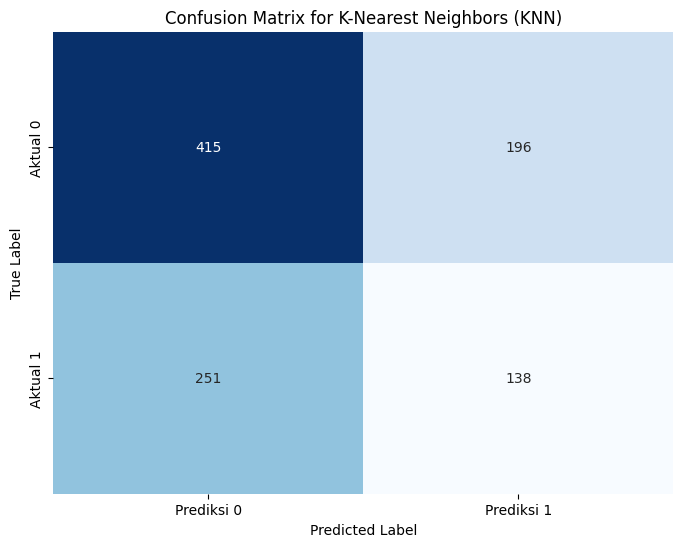

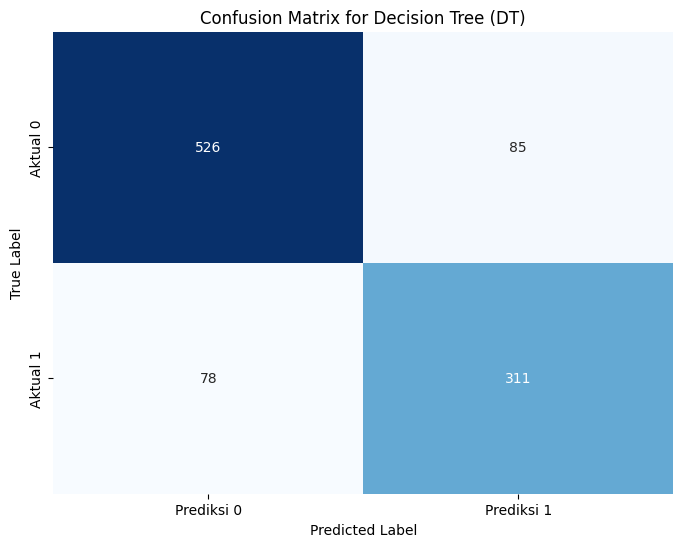

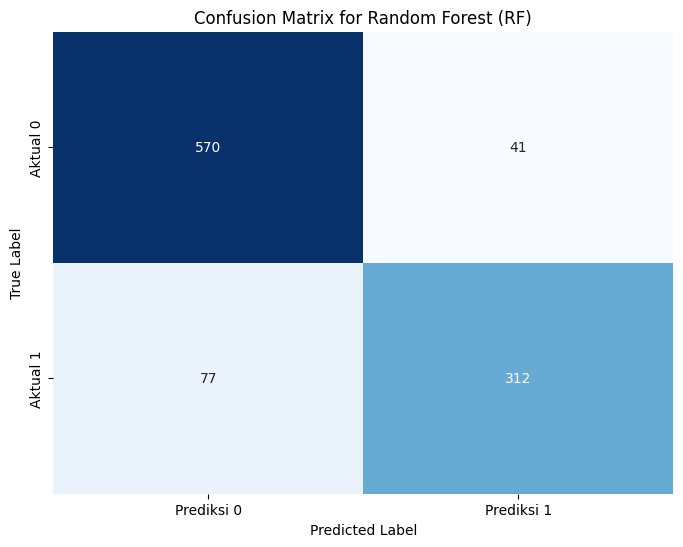

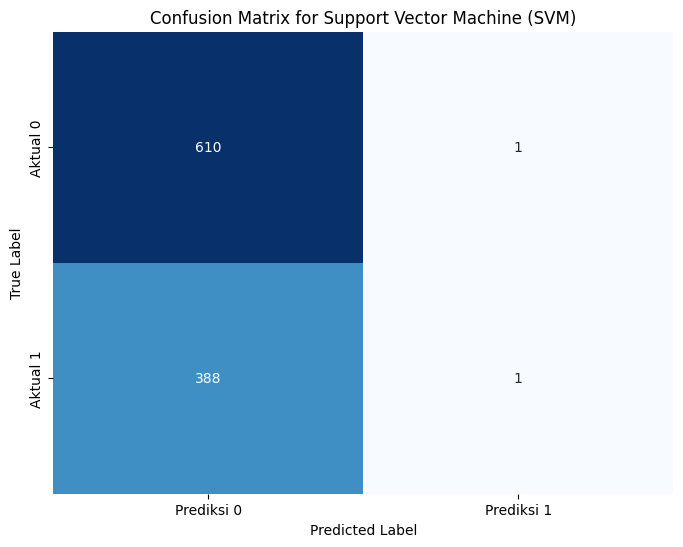

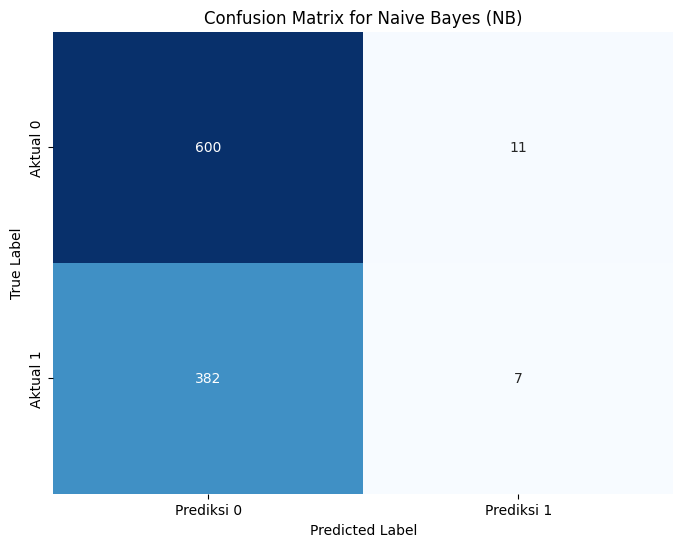

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fungsi untuk memvisualisasikan confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Prediksi 0', 'Prediksi 1'],
                yticklabels=['Aktual 0', 'Aktual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test_class),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test_class),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test_class),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test_class),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test_class)
}

# Memvisualisasikan confusion matrix untuk setiap model
for model_name, metrics in results.items():
    plot_confusion_matrix(metrics['Confusion Matrix'], model_name)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Hasil Confusion Matrix Algoritma KNN
   Model berhasil mengidentifikasi 138 data yang sebenarnya churn (true positive) dengan benar, sementara 196 data yang sebenarnya tidak churn teridentifikasi sebagai churn (false positive). Sebalikan ada 251 data yang sebenarnya churn, tetapi tidak terdeteksi oleh model (false negative) dan 415 data yang benar-benar tidak churn dan diprediksi dengan benar (true negative). Hasil ini memberikan gambaran tentang kemampuan model KNN dalam mengklasifikasikan data dengan tepat.

   Metrik:
    - Accuracy: ((TP + TN) / (TP + TN + FP + FN) = (138 + 415) / (138 + 415 + 196 + 251) = 0.634)
    - Precision: (TP / (TP + FP) = 138 / (138 + 196) = 0.413)
    - Recall: (TP / (TP + FN) = 138 / (138 + 251) = 0.354)
    - F1-Score: (2 x ((Precision x Recall) / (Precision + Recall)) = 2 x ( (0.413 x 0.354) / (0.413 + 0.354)) = 0.380)
   
2. Hasil Confusion Matrix Algoritma Decision Tree
   hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 526 true negative (TN) yang berarti data tidak churn terdeteksi dengan benar. Sebanyak 85 false positive (FP) menunjukkan bahwa data yang tidak churn salah diklasifikasikan sebagai churn. Selain itu, 78 false negative (FN) menggambarkan data yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Akhirnya, model berhasil mendeteksi 311 true positive (TP), yaitu data yang benar-benar churn. Analisis ini memberikan wawasan tentang kinerja model dalam memprediksi churn dan area yang perlu diperbaiki.

   Metrik :
   - Accuracy: ((311 + 526) / (311 + 526 + 85 + 78) = 0.866)
   - Precision: (311 / (311 + 85) = 0.786)
   - Recall: (311 / (311 + 78) = 0.799)
   - F1-Score: (2 x ((0.786 x 0.799) / (0.786 + 0.799)) = 0.792)
   
3. Hasil Confusion Matrix Algoritma Random Forest
   hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 570 true negative (TN) yang berarti data tidak churn terdeteksi dengan benar. Sebanyak 41 false positive (FP) menunjukkan data yang tidak churn salah diklasifikasikan sebagai churn. Model ini juga menghasilkan 77 false negative (FN) yang menggambarkan data yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Terakhir, ada 312 true positive (TP), yaitu data benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini memberikan gambaran tentang seberapa baik Random Forest dalam memprediksi churn dan menunjukkan bahwa model menangani masing-masing kelas.

    Metrik:
   - Accuracy: ((312 + 570) / (312 + 570 + 41 + 77) = 0.911)
   - Precision: (312 / (312 + 41) = 0.884)
   - Recall: (312 / (312 + 77) = 0.802)
   - F1-Score: (2 x ((0.884 x 0.802) / (0.884 + 0.802)) = 0.841)
   
4. Hasil Confusion Matrix Algoritma SVM
   hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 610 true negative (TN), yang berarti data tidak churn terdeteksi dengan benar. Sebanyak 1 false positive (FP) menunjukkan data yang tidak churn salah diklasifikasikan sebagai churn. Model ini juga menghasilkan 388 false negative (FN), menggambarkan data yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Terakhir, ada 1 true positive (TP), yaitu data benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini mencerminkan bahwa SVM mengelola prediksi churn dan performanya dalam klasifikasi.

   Metrik:
   - Accuracy: ((1 + 610) / (1 + 610 + 1 + 388) = 0.610)
   - Precision: (1 / (1 + 1) = 0.500)
   - Recall: (1 / (1 + 388) = 0.003)
   - F1-Score: (2 x ((0.500 x 0.003) / (0.500 + 0.003)) = 0.006)

5. Hasil Confusion Matrix Algoritma Naive Bayes
   hasil evaluasi memberikan gambaran sebagai berikut: ada 600 true negative (TN), menunjukkan data tidak churn yang terdeteksi dengan benar. Sebanyak 11 false positive (FP) menunjukkan data yang tidak churn salah diklasifikasikan sebagai churn.  Model ini juga menghasilkan 382 false negative (FN), menunjukkan data yang sebenarnya churn, tetapi tidak teridentifikasi sebagai churn. Terakhir, ada 7 true positive (TP), yaitu data benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini menggambarkan performa Naive Bayes dalam mengidentifikasi data yang akan churn.

    Metrik :
    - Accuracy: 0.607 (60.7%)
    - Precision: 0.389 (38.9%)
    - Recall: 0.018 (1.8%)
    - F1-Score: 0.034 (3.4%)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
   Tidak melakukan proses tuning  
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    - Pada KKN, recall rendah, karena banyak false negative (FN)
    - Decision Tree, Bisa mengalami overfitting karena cenderung menangkap noise data
    - Random forest, memberikan keseimbangan precision dan recall lebih baik, tetapi bisa ditingkatkan
    - SVM, sangat buruk dalam recall, hampir semua churn tidak terdeteksi
    - naive bayes, semua matrik performa buruk, terutama recall
    
  - Apakah model mengalami overfitting atau underfitting?
    - Overfitting:
      - Decision Tree memiliki performa yang tinggi, tetapi perlu dicek apakah akurasinya juga tinggi di data uji.
      - Random Forest cukup stabil karena merupakan ansambel dari banyak Decision Tree.
    - Underfitting: KNN, SVM, dan Naive Bayes memiliki skor rendah, menunjukkan bahwa model tidak menangkap pola data dengan baik.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
- Data Preprocessing & Feature Engineering
    - Cek distribusi kelas: Apakah dataset imbalanced? Jika ya, gunakan oversampling (SMOTE) atau undersampling untuk menyeimbangkan jumlah data tiap kelas.
    - Feature selection: Coba gunakan PCA atau SelectKBest untuk memilih fitur yang lebih relevan.
    - Feature scaling: Algoritma seperti SVM & KNN bekerja lebih baik jika menggunakan StandarScaler atau MinMaxScaler.
- Gunakan GridSearchCV atau RandomizedSearchCV
- Coba Algoritma Lain
    - Gradient Boosting (XGBoost, LightGBM, CatBoost) → Sering outperform Random Forest.
    - Neural Network (MLPClassifier) → Bisa dicoba jika dataset cukup besar.